In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Position_Salaries.csv')
print(df)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [3]:
x = df["Level"]
y = df["Salary"]
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [4]:
x_l = df.iloc[:, 1:-1].values
y_p = df.iloc[:, -1].values
print(x_l)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
print(y_p)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [6]:
y_p = y_p.reshape(-1,1)
print(y_p)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [7]:
from sklearn.preprocessing import StandardScaler 
stds_x = StandardScaler()
stds_y = StandardScaler()
x_l = stds_x.fit_transform(x_l)
y_p = stds_y.fit_transform(y_p)

In [8]:
print('Scaled x_l :')
print(x_l)
print('Scaled y_p :')
print(y_p)

Scaled x_l :
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
Scaled y_p :
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


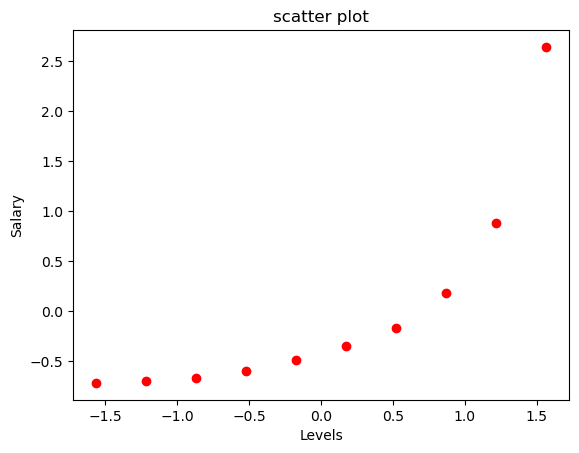

In [9]:
plt.scatter(x_l,y_p,color ='red')
plt.title ('scatter plot')
plt.xlabel('Levels')
plt.ylabel('Salary')
plt.show()

In [10]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x_l,y_p)
A=regressor.predict(stds_x.transform([[1.2]]))
print(A)

[-0.62965521]


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
A = A.reshape(-1,1)
print(A)

[[-0.62965521]]


In [12]:
A_pred = stds_y.inverse_transform(A)
print(A_pred)

[[70670.99294089]]


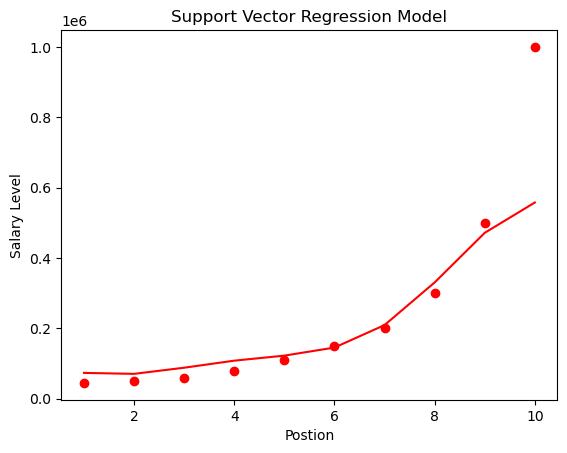

In [13]:
plt.scatter(stds_x.inverse_transform(x_l),stds_y.inverse_transform(y_p),color ='red')
plt.plot(stds_x.inverse_transform(x_l) , stds_y.inverse_transform(regressor.predict(x_l).reshape(-1,1)),color = 'red')
plt.title ('Support Vector Regression Model')
plt.xlabel('Postion')
plt.ylabel('Salary Level')
plt.show()